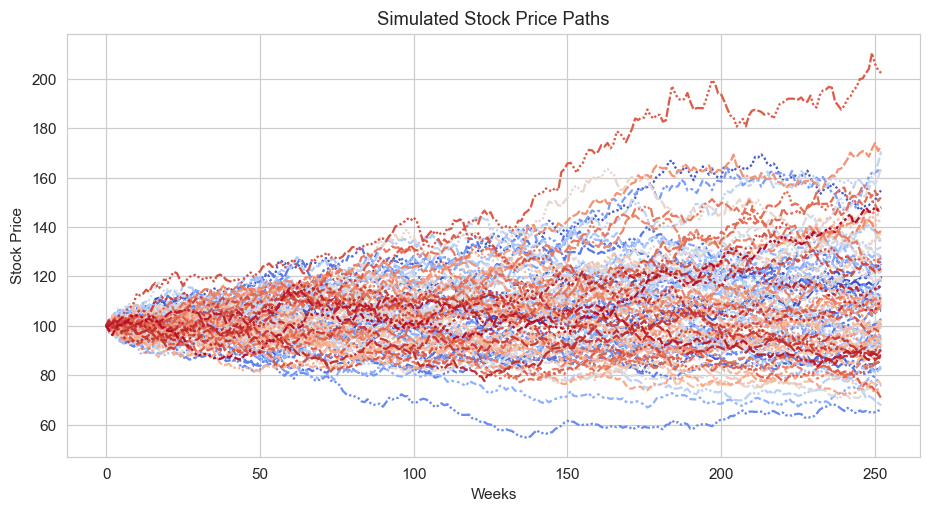

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_lognormal(S0, mu, sigma, T, dt, nsim):
    """
    Simulate lognormal price paths using Monte Carlo simulation.

    Parameters
    ----------
    S0 : float
        Initial price.
    mu : float
        Drift (like the expected return).
    sigma : float
        Volatility (how much it bounces around).
    T : float
        Time horizon in years.
    dt : float
        Time step size in years.
    nsim : int
        Number of paths to simulate.

    Returns
    -------
    t : numpy.ndarray
        Time grid.
    prices : numpy.ndarray
        Simulated price paths.
    """

    N = int(T / dt)  # Total number of time steps
    t = np.linspace(0, T, N + 1)  # Time grid

    # Generate Brownian motion (cumulative sum of normal random values)
    W = np.random.normal(0, 1, (nsim, N))  # Random draws for all paths
    W = np.cumsum(np.sqrt(dt) * W, axis=1)  # Scale by sqrt(dt) and accumulate
    W = np.insert(W, 0, 0, axis=1)  # Add initial value at t=0

    # Generate the lognormal price paths
    prices = S0 * np.exp((mu - 0.5 * sigma ** 2) * t + sigma * W)
    return t, prices

# Set parameters
S0 = 100  # Initial price
mu = 0.05  # Drift (like the expected return)
sigma = 0.2  # Volatility (how much it bounces around)
T = 1  # Time horizon in years
dt = 1 / 252  # Daily steps (assuming 252 trading days/year)
nsim = 100  # Number of paths to simulate

# Run the simulation
t, simulated_prices = monte_carlo_lognormal(S0, mu, sigma, T, dt, nsim)

# Plot the results
plt.figure(figsize=(10, 5), dpi=110)
sns.set_style("whitegrid")
sns.lineplot(data=simulated_prices[:100].T, palette="coolwarm", legend=False)
plt.title('Simulated Stock Price Paths')
plt.xlabel('Weeks')
plt.ylabel('Stock Price')
plt.show()